In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Social Media Usage vs. Student Well-Being

Exploratory Data Analysis (EDA) on a survey of students aged 16–25 to uncover how social media usage affects academic performance, sleep, mental health, and personal relationships.

## 📌 Problem Statement

With rising screen time among youth, this project explores the relationship between social media usage and its impact on students' academic outcomes, mental health, sleep, and interpersonal conflicts.

We aim to answer:

- Which platforms are used most by students?
- Is there a link between usage hours and addiction scores?
- Do students feel their academic performance is being affected?
- Are addicted users more likely to experience poor mental health, sleep deprivation, or social conflicts?


In [6]:
#Importing The Dataset
df = pd.read_csv("Students Social Media Addiction.csv")

In [7]:
#Preview
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


### 🧠 1. General Usage Patterns
- What is the average daily social media usage across all students?

- Which platforms are most used, and how does that vary by age?

- Is there a correlation between daily usage hours and addiction score?



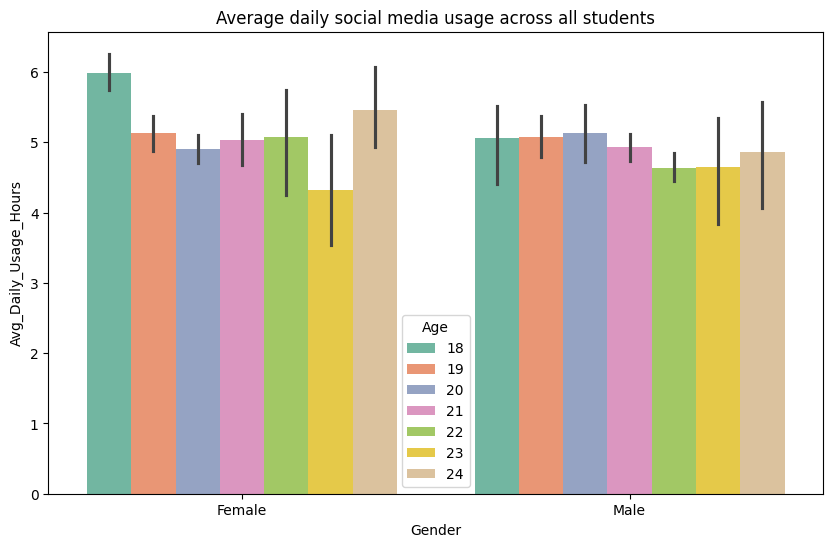

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x=df['Gender'],y=df['Avg_Daily_Usage_Hours'],hue=df['Age'],palette='Set2')
plt.title("Average daily social media usage across all students")
plt.show()

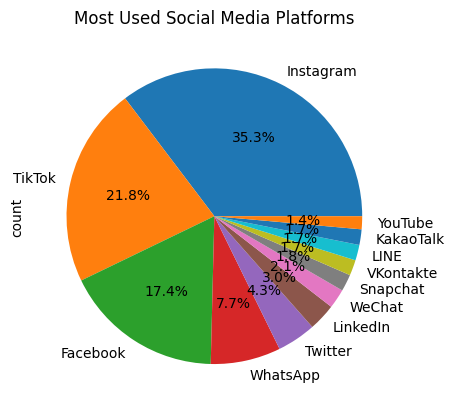

In [9]:
df['Most_Used_Platform'].value_counts().plot(kind='pie',autopct = '%0.1f%%')
plt.title("Most Used Social Media Platforms")
plt.show()


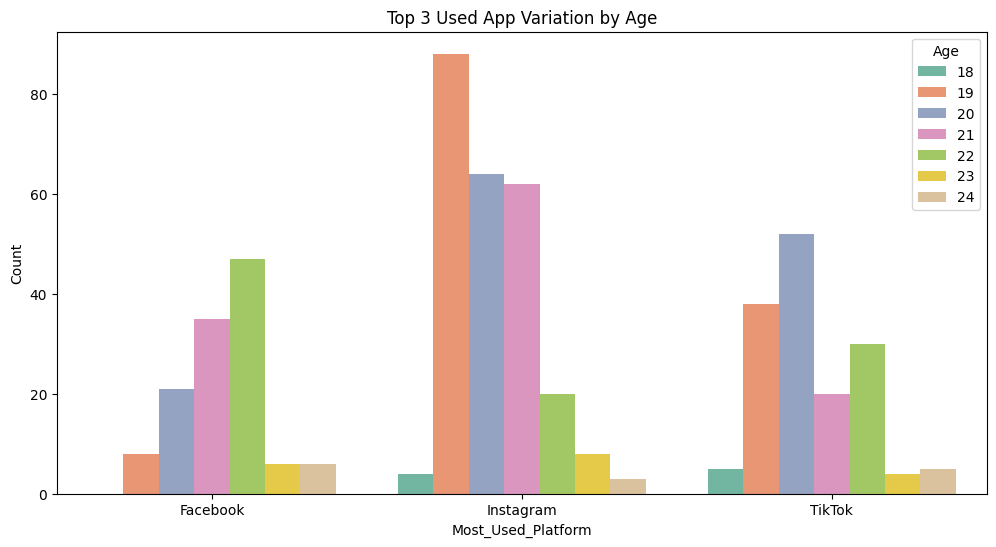

In [10]:
plt.figure(figsize=(12,6))
p_b_c = df.groupby('Most_Used_Platform')['Age'].value_counts().reset_index(name='Count')
p_b_c = p_b_c[p_b_c['Most_Used_Platform'].isin(['Facebook', 'Instagram', 'TikTok'])]
sns.barplot(data=p_b_c,x='Most_Used_Platform',y='Count',hue='Age',palette='Set2')
plt.title("Top 3 Used App Variation by Age")
plt.show()


In [11]:
df['Avg_Daily_Usage_Hours'].corr(df['Addicted_Score'])


np.float64(0.8320001573523091)

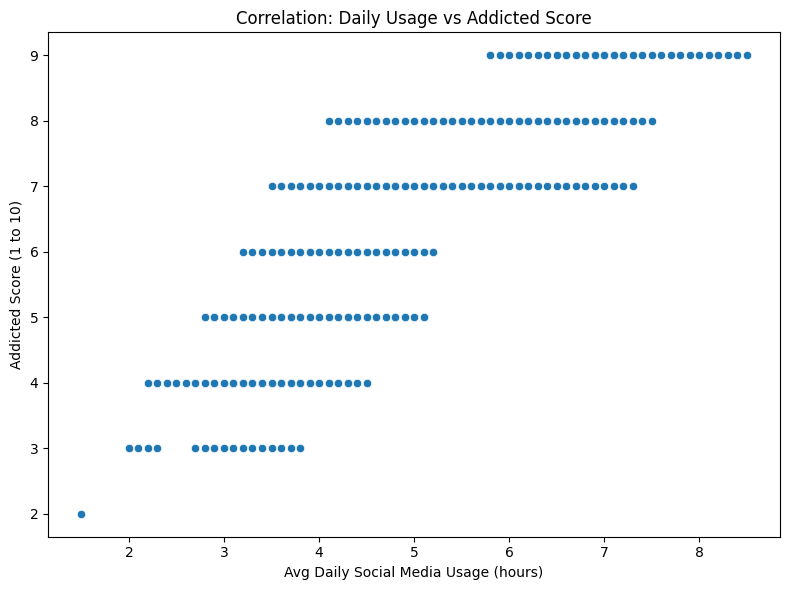

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Avg_Daily_Usage_Hours', y='Addicted_Score')
plt.title('Correlation: Daily Usage vs Addicted Score')
plt.xlabel('Avg Daily Social Media Usage (hours)')
plt.ylabel('Addicted Score (1 to 10)')
plt.tight_layout()
plt.show()


### 🧠 1. Conclusions:
- The Platforms Most Used are Instagram, TikTok, Facebook
- Age 18 in Females are Most Active while Age 20 in Males are Most Active on Social Media
- There is a definately correlation between daily usage hours and addiction score in positive order

### 🎓 2. Academic Impact
- Do students who use social media more report that it affects their academic performance?

- Is there a difference in usage hours and Addicted_Score between High School, Undergraduate, and Graduate students?

- Are students with high Addicted_Score more likely to say it impacts their academic performance?

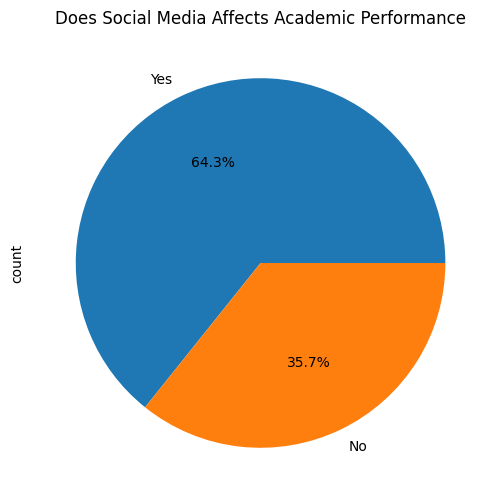

In [14]:
plt.figure(figsize=(10,6))
df['Affects_Academic_Performance'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title("Does Social Media Affects Academic Performance")
plt.show()

<Axes: xlabel='Academic_Level', ylabel='Avg_Daily_Usage_Hours'>

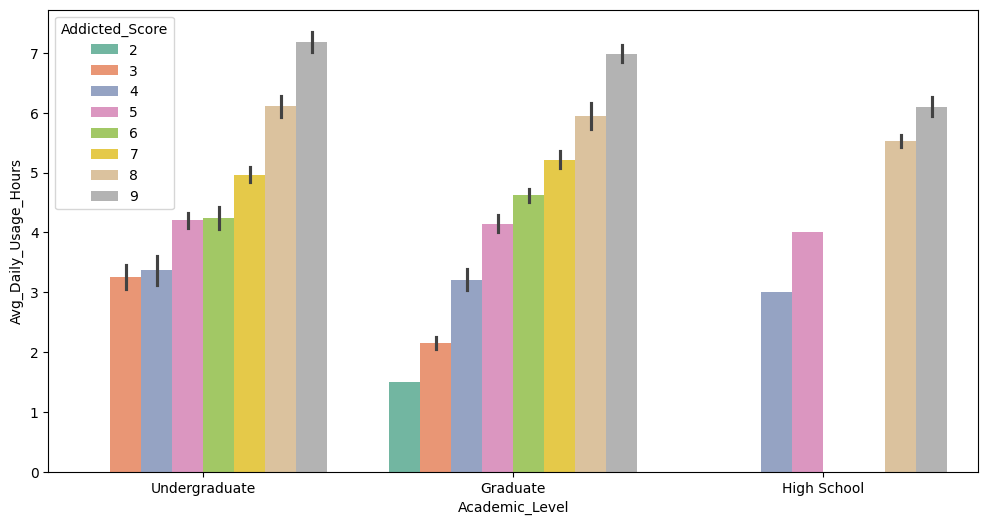

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x=df['Academic_Level'],y=df['Avg_Daily_Usage_Hours'],hue=df['Addicted_Score'],palette="Set2")


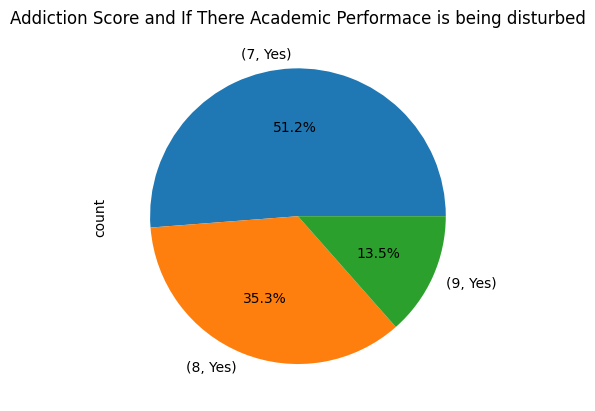

In [16]:
high_addicted_score = df[df['Addicted_Score'] >6]
high_addicted_score.groupby('Addicted_Score')['Affects_Academic_Performance'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title("Addiction Score and If There Academic Performace is being disturbed")
plt.show()

### 🎓 2. Conclusions
- Do students who use social media more report that it affects their academic performance?
  - 64.3% Students Says YES
- Is there a difference in usage hours and Addicted_Score between High School, Undergraduate, and Graduate students?
  - Not Much Difference
- Are students with high Addicted_Score more likely to say it impacts their academic performance?
  - All Students above 6 Score says YES

### 🌙 3. Sleep & Mental Health
- Is there a relationship between Avg_Daily_Usage_Hours and Sleep_Hours_Per_Night?

- Does social media addiction correlate with lower mental health scores?

- Do students with low sleep and high usage report lower mental health scores?

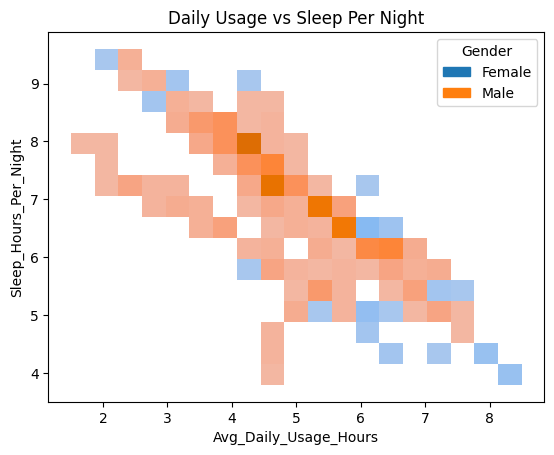

In [17]:
sns.histplot(data=df,x=df['Avg_Daily_Usage_Hours'],y=df['Sleep_Hours_Per_Night'],hue='Gender')
plt.title("Daily Usage vs Sleep Per Night")
plt.show()

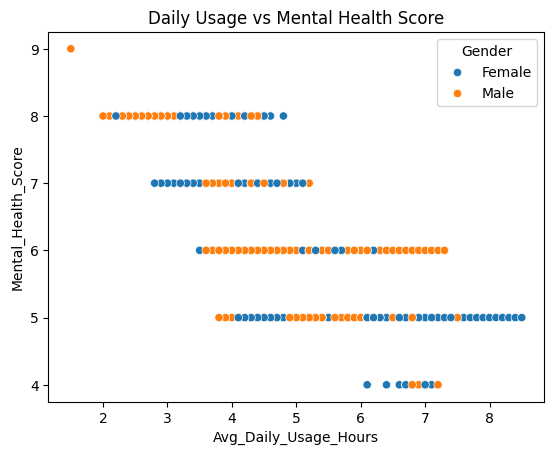

In [18]:
sns.scatterplot(data=df,x=df['Avg_Daily_Usage_Hours'],y=df['Mental_Health_Score'],hue='Gender')
plt.title("Daily Usage vs Mental Health Score")
plt.show()

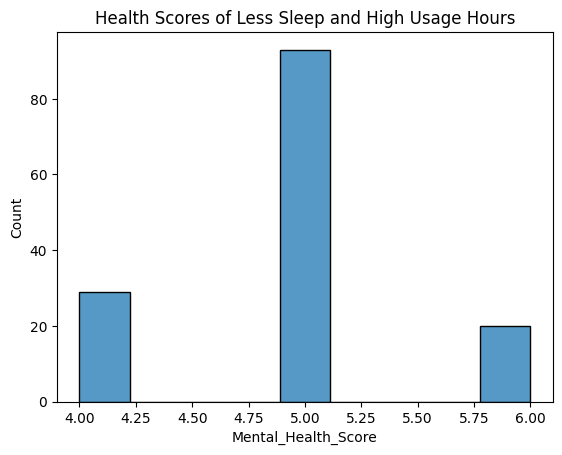

In [19]:
mask = df[(df['Avg_Daily_Usage_Hours']>6) & (df['Sleep_Hours_Per_Night']<7)]
sns.histplot(data=mask,x = mask['Mental_Health_Score'])
plt.title("Health Scores of Less Sleep and High Usage Hours")
plt.show()

### 🌙 3. Conclusions:
- Is there a relationship between Avg_Daily_Usage_Hours and Sleep_Hours_Per_Night?
  - Yes the more Usage the less Sleep
- Does social media addiction correlate with lower mental health scores?
  - It Does, Less Usage shoews better Health Scores
- Do students with low sleep and high usage report lower mental health scores?
  - Its in the Mid

### 🌍 4. Demographic Insights
- Do males and females use social media differently (hours, platforms)?

- Which countries have the highest average daily social media usage?

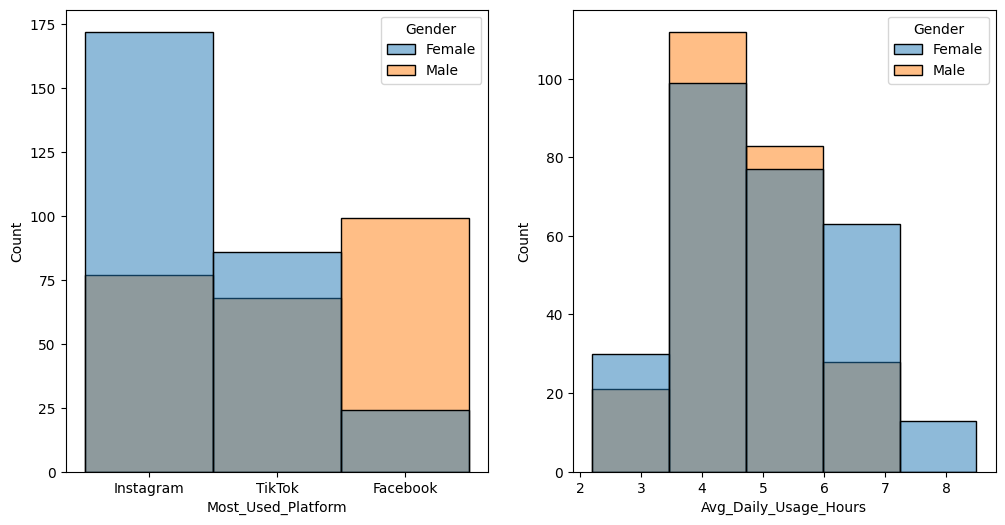

In [21]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
p = df[df['Most_Used_Platform'].isin(['Facebook','TikTok','Instagram'])]
sns.histplot(data=p,x=p['Most_Used_Platform'],hue='Gender',ax=ax[0])

sns.histplot(data=p,x=df['Avg_Daily_Usage_Hours'],hue='Gender',ax=ax[1],bins=5)
plt.show()

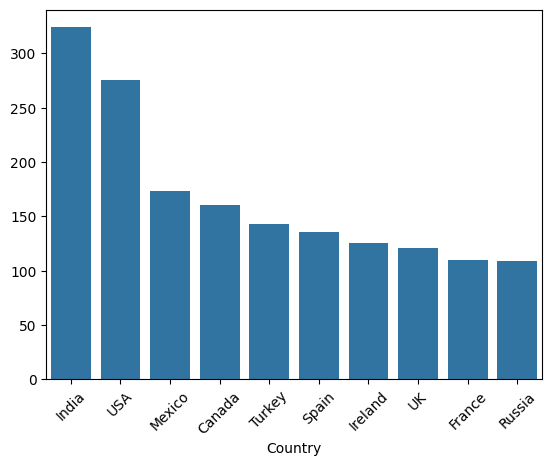

In [22]:
c = df.groupby('Country')['Avg_Daily_Usage_Hours'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=c.index,y=c.values)
plt.xticks(rotation = 45)
plt.show()

### 🌍 4. Conclusions
- Do males and females use social media differently (hours, platforms)?
  - Yes Females are more active on Instagram and Tiktok while Males are more active on Facebook
- Which countries have the highest average daily social media usage?
  - 1.India 2. Usa 3. Mexico



### ❤️ 5. Social Relationships
- Do students in a relationship report more conflicts over social media?

- Are single students more addicted than those in a relationship?

- How does relationship status relate to mental health score?



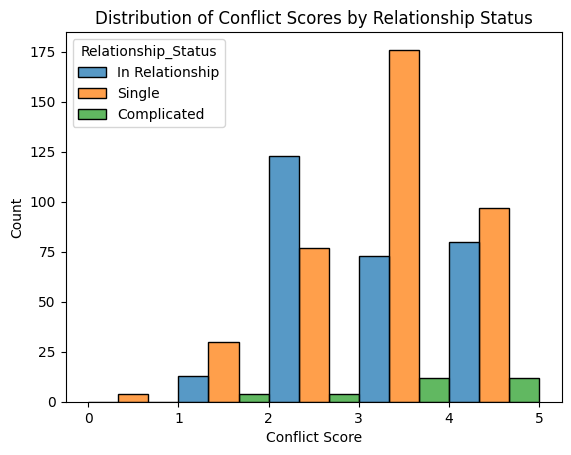

In [33]:
sns.histplot(data=df, x='Conflicts_Over_Social_Media', hue='Relationship_Status', multiple='dodge', bins=5)
plt.title("Distribution of Conflict Scores by Relationship Status")
plt.xlabel("Conflict Score")
plt.ylabel("Count")
plt.show()


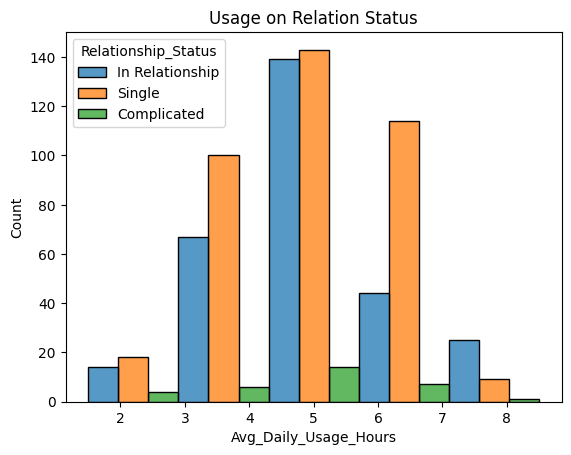

In [36]:
sns.histplot(data=df, x='Avg_Daily_Usage_Hours', hue='Relationship_Status', multiple='dodge', bins=5)
plt.title("Usage on Relation Status")
plt.show()

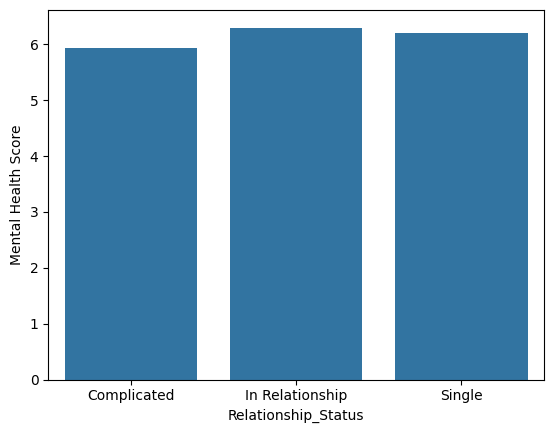

In [41]:
rsc = df.groupby('Relationship_Status')['Mental_Health_Score'].mean()
sns.barplot(x=rsc.index,y=rsc.values)
plt.ylabel("Mental Health Score")
plt.show()


### ❤️ 5. Conclusions
- Do students in a relationship report more conflicts over social media?
  - NO
- Are single students more addicted than those in a relationship?
  - YES
- How does relationship status relate to mental health score?
  - Almost Same for all Categories


### 🔥 6. Addiction Focused
- What are the top 5 most common usage patterns among students with Addicted_Score ≥ 8?

- Are students who spend more than 5 hours/day significantly more likely to have Addicted_Score ≥ 7?

- Does higher conflict over social media always imply higher Addicted_Score?

In [46]:
hdc = df[df['Addicted_Score']>8]

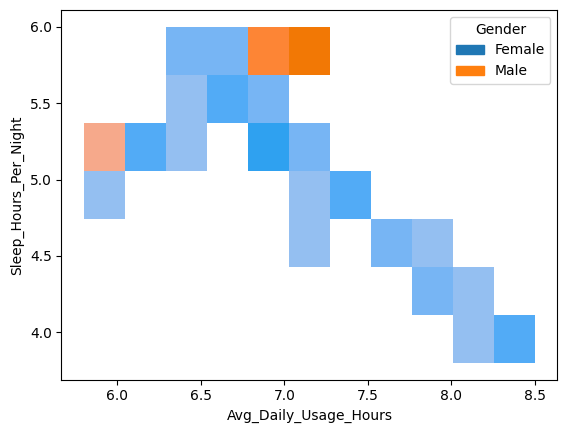

In [53]:
sns.histplot(data=hdc,x='Avg_Daily_Usage_Hours',y='Sleep_Hours_Per_Night',hue='Gender')
plt.show()

In [61]:
hu = df[df['Avg_Daily_Usage_Hours']>5]

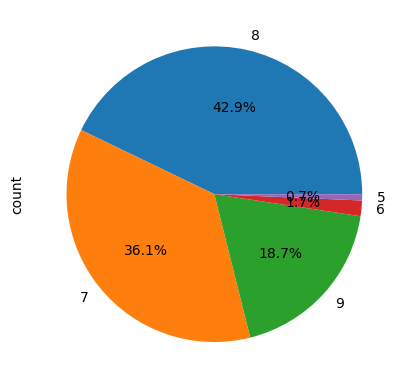

In [64]:
# sns.histplot(data=hu,x='Addicted_Score')
# plt.show()
hu['Addicted_Score'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

/tmp/ipython-input-60-2965706034.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


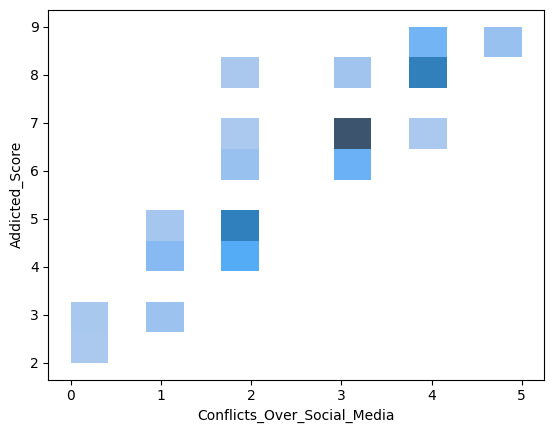

In [ ]:
sns.histplot(
    data=df,
    x='Conflicts_Over_Social_Media',
    y='Addicted_Score',
    palette='Set2'
)
plt.show()

### 🔥 6. Conclusions:
- What are the top 5 most common usage patterns among students with Addicted_Score ≥ 8?
  - Their Sleep Cycle is less than 6 hours and descreasing and Usage is Very high and Increasing
- Are students who spend more than 5 hours/day significantly more likely to have Addicted_Score ≥ 7?
  - Definately More than 95% Students has more than 7
- Does higher conflict over social media always imply higher Addicted_Score?
  - Yes, it Does

## 📊 Key Insights

- **Instagram, TikTok, and Facebook** are the most used platforms, with Instagram dominating usage in most age groups.
- There is a **positive correlation (≈0.6)** between average daily usage and addicted scores.
- Students who report that social media **affects their academic performance** often use platforms for 5+ hours/day.
- **Highly addicted students (Addicted_Score ≥ 8)** are more likely to report poor sleep (<6 hours) and lower mental health scores (≤ 5).
- A clear usage pattern among addicted students: heavy TikTok/Instagram use, poor sleep, and increased interpersonal conflicts.


## 📎 Conclusion

This analysis shows that excessive social media use — particularly on TikTok and Instagram — is associated with higher addiction scores, reduced sleep, academic difficulties, and declining mental well-being.

While correlation does not imply causation, the patterns suggest a strong link between high screen time and negative life outcomes among students. These findings highlight the need for digital wellness strategies and responsible social media habits, especially among youth.

Future work could include predictive modeling (e.g., can usage data predict low mental health?) or building interactive dashboards using Plotly or Dash for better engagement.
